<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S4E1_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S4E1 BANK CHURN**

##### About Dataset
The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

* Customer ID: A unique identifier for each customer
* Surname: The customer's surname or last name
* Credit Score: A numerical value representing the customer's credit score
* Geography: The country where the customer resides (France, Spain or Germany)
* Gender: The customer's gender (Male or Female)
* Age: The customer's age.
* Tenure: The number of years the customer has been with the bank
* Balance: The customer's account balance
* NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
* HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
* IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
* EstimatedSalary: The estimated salary of the customer
* Exited: Whether the customer has churned (1 = yes, 0 = no)

##### Evaluation
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.


The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Churn_Modelling.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [56]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [57]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

from IPython.display import display_html, clear_output;
clear_output();

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
from copy import deepcopy
import re
#from scipy import stats
from random import randint
from prettytable import PrettyTable
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_extraction.text import TfidfVectorizer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              AdaBoostClassifier,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              GradientBoostingClassifier,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
from catboost import CatBoost, CatBoostRegressor
from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 0.02329874038696289 sec


<Figure size 640x480 with 0 Axes>

In [58]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.1
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.3


In [59]:
def seed_everything(seed,
                    tensorflow_init=True,
                    pytorch_init=True):
    """
    Seeds basic parameters for reproducibility of results
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    if tensorflow_init is True:
        tf.random.set_seed(seed)
    if pytorch_init is True:
        torch.manual_seed(seed)
        torch.cuda.manual_seed(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False


seed_everything(42,tensorflow_init=True,pytorch_init=False)

### 1.2 Connect Drives:

In [60]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [61]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [62]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S4E1_BankChurn/trees_models/ already exists


## 2.0 The Dataset

In [63]:
global device
device = 'cpu'

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
original=pd.read_csv("Churn_Modelling.csv")

train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)
original.drop(columns=['RowNumber'],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

target='Exited'

train.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [64]:
table = PrettyTable()

table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',"Original Missing%"]
for column in train_copy.columns:
    data_type = str(train_copy[column].dtype)
    non_null_count_train= np.round(100-train_copy[column].count()/train_copy.shape[0]*100,3)
    if column!=target:
        non_null_count_test = np.round(100-test_copy[column].count()/test_copy.shape[0]*100,3)
    else:
        non_null_count_test="NA"
    non_null_count_orig= np.round(100-original_copy[column].count()/original_copy.shape[0]*100,3)
    table.add_row([column, data_type, non_null_count_train,non_null_count_test,non_null_count_orig])
print(table)

+-----------------+-----------+-----------------+----------------+-------------------+
|     Feature     | Data Type | Train Missing % | Test Missing % | Original Missing% |
+-----------------+-----------+-----------------+----------------+-------------------+
|    CustomerId   |   int64   |       0.0       |      0.0       |        0.0        |
|     Surname     |   object  |       0.0       |      0.0       |        0.0        |
|   CreditScore   |   int64   |       0.0       |      0.0       |        0.0        |
|    Geography    |   object  |       0.0       |      0.0       |        0.01       |
|      Gender     |   object  |       0.0       |      0.0       |        0.0        |
|       Age       |  float64  |       0.0       |      0.0       |        0.01       |
|      Tenure     |   int64   |       0.0       |      0.0       |        0.0        |
|     Balance     |  float64  |       0.0       |      0.0       |        0.0        |
|  NumOfProducts  |   int64   |       0.0  

### 2.1 Target Features

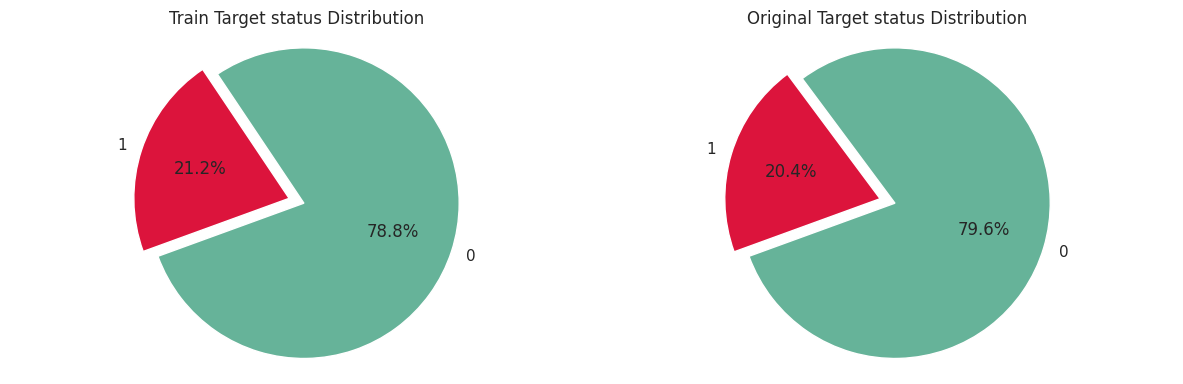

In [65]:
def plot_pie_chart(data, title, ax):
    data_counts = data[target].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [ (0.4, 0.7, 0.6), 'crimson']
    explode = (0.1, 0)

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=200)
    ax.axis('equal')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create three subplots in a row

plot_pie_chart(train_copy, "Train Target status Distribution", axes[0])
plot_pie_chart(original, "Original Target status Distribution", axes[1])

plt.tight_layout()
plt.show()

### 2.2 Numerical Feature Distributions

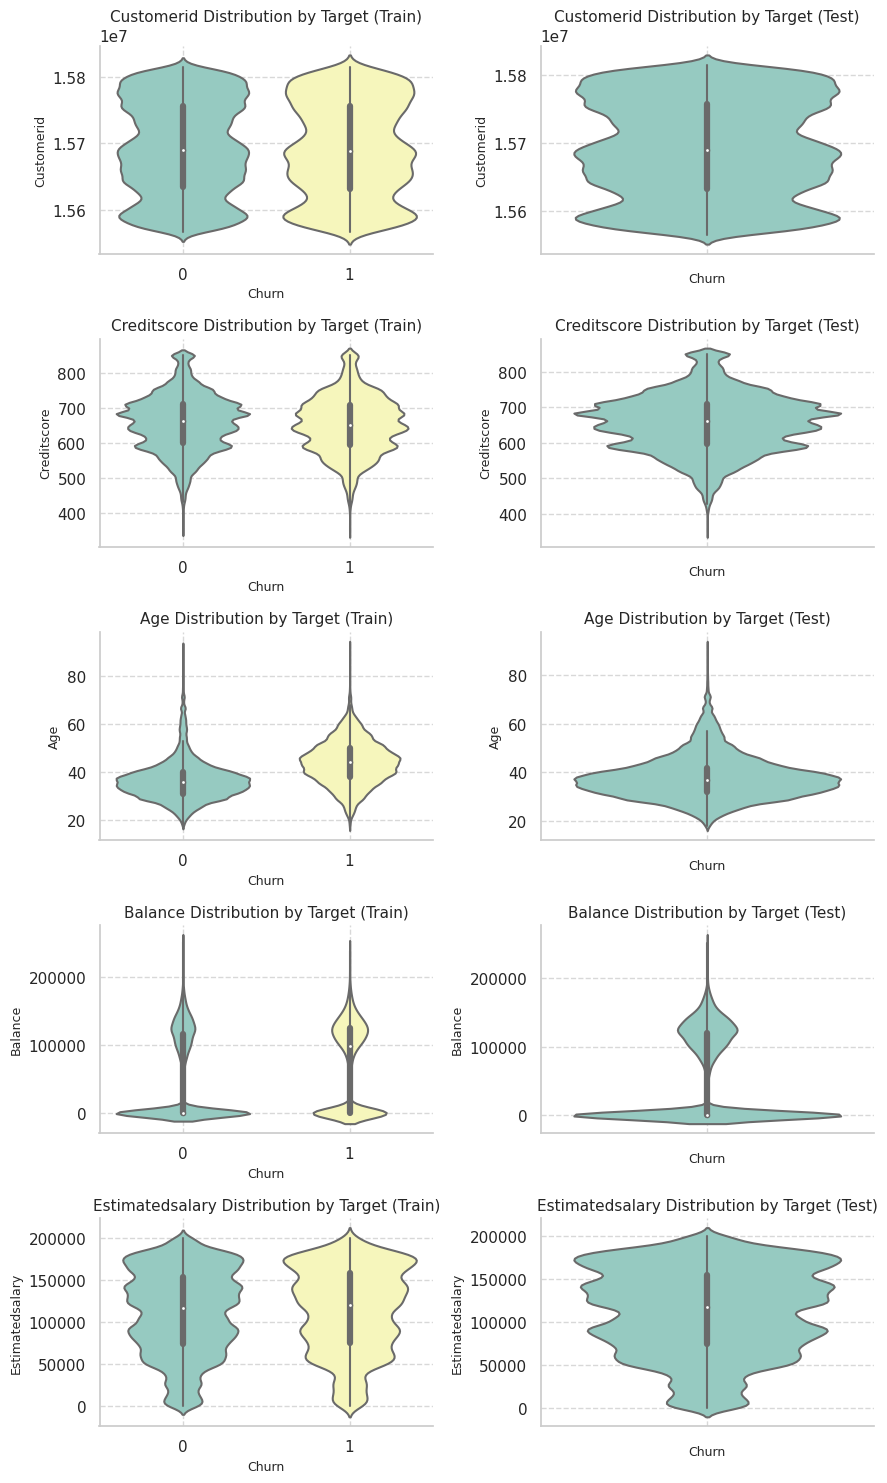

In [66]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique()>21]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(9, 3 * n_rows))
sns.set_palette("Set3")
for i, col in enumerate(cont_cols):
    sns.violinplot(x=target, y=col, data=train_copy, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=11)
    axs[i, 0].set_xlabel('Churn', fontsize=9)
    axs[i, 0].set_ylabel(col.title(), fontsize=9)
    axs[i, 0].grid(linestyle='--', alpha=0.75)
    sns.despine()

    sns.violinplot(y=col, data=test_copy, ax=axs[i, 1])
    axs[i, 1].set_title(f'{col.title()} Distribution by Target (Test)', fontsize=11)
    axs[i, 1].set_xlabel('Churn', fontsize=9)
    axs[i, 1].set_ylabel(col.title(), fontsize=9)
    axs[i, 1].grid(linestyle='--', alpha=0.75)
    sns.despine()

fig.tight_layout()

plt.show()

### 2.3 Categorical Features:

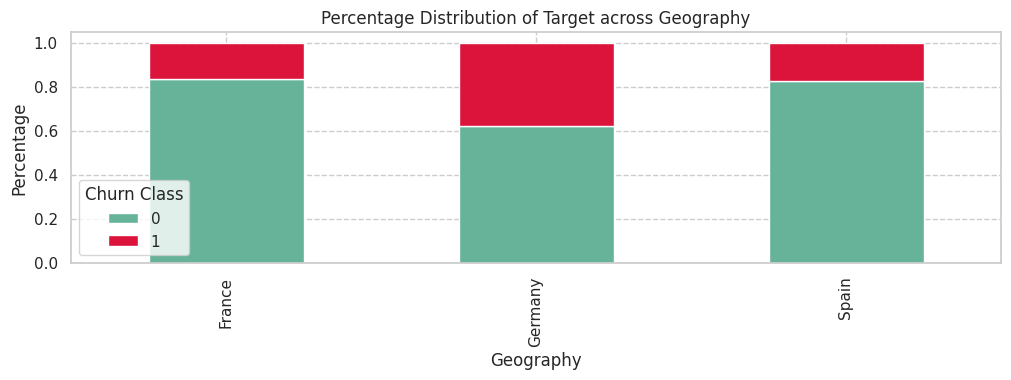

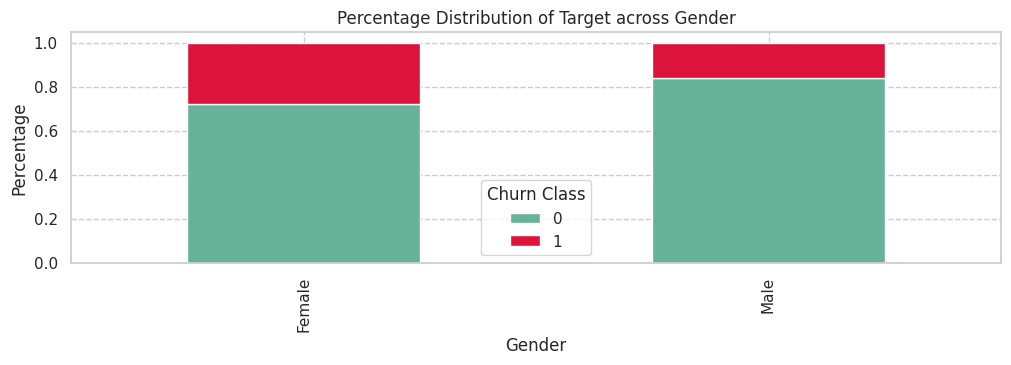

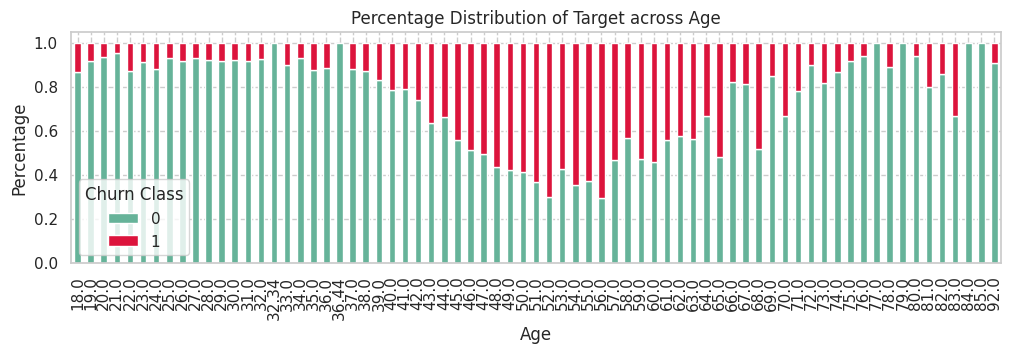

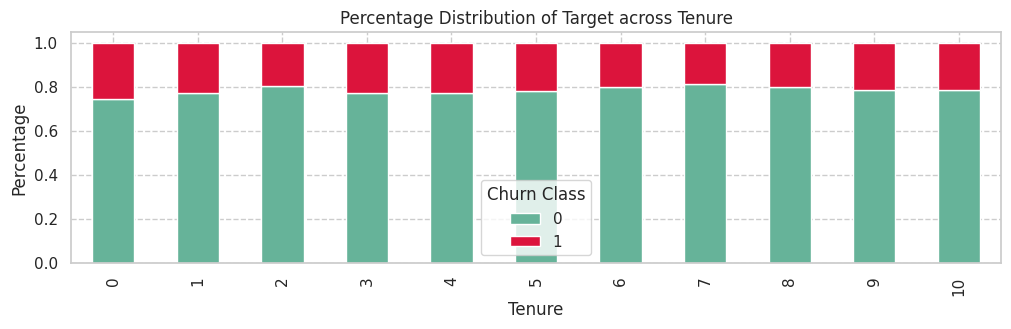

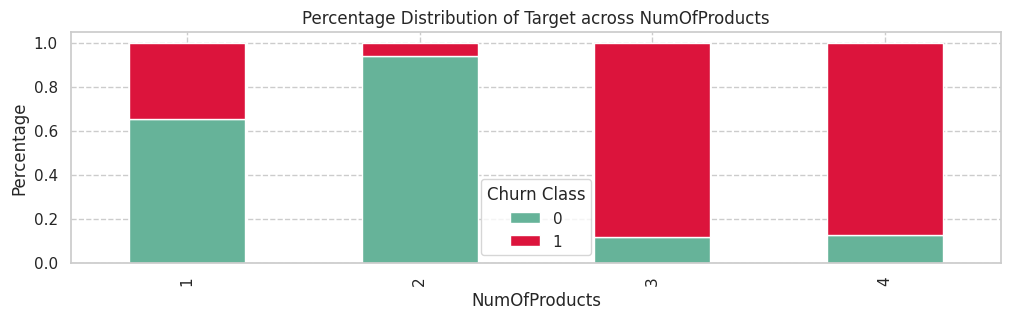

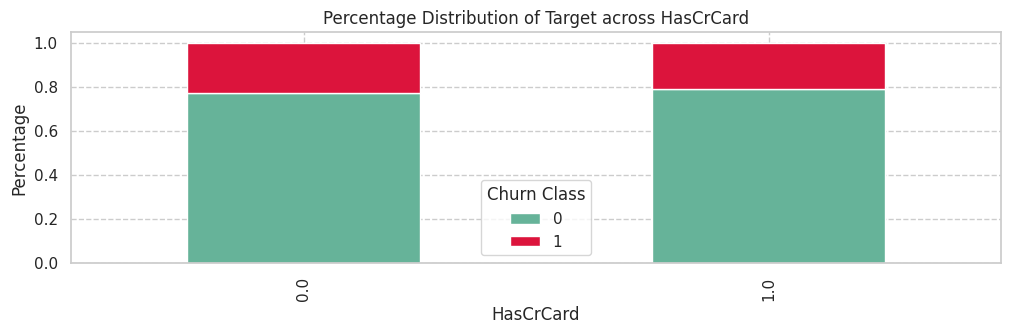

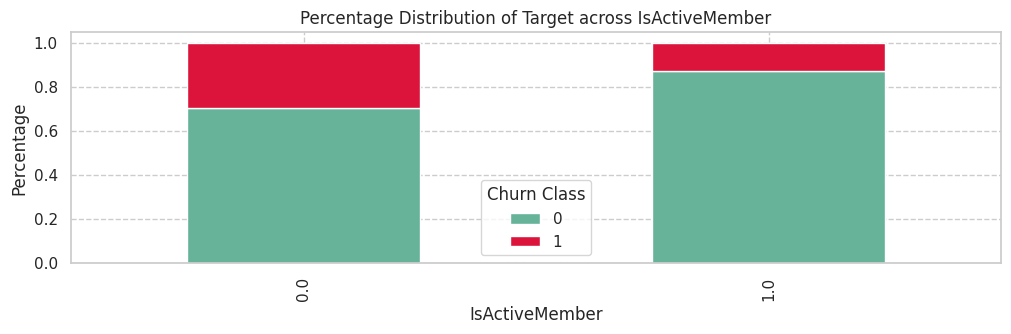

In [67]:
cat_cols = [f for f in test.columns if (train[f].dtype != 'O' and train[f].nunique() <100) or (train[f].dtype == 'O' and f not in [target] and train[f].nunique() <100) ]
custom_palette =(0.4, 0.7, 0.6), 'crimson'
for col in cat_cols:
    contingency_table = pd.crosstab(train[col], train[target], normalize='index')
    sns.set(style="whitegrid")
    contingency_table.plot(kind="bar", stacked=True, color=custom_palette,figsize=(12, 3))
    plt.title(f"Percentage Distribution of Target across {col}")
    plt.grid(linestyle='--')
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(title="Churn Class")
    plt.show()

## 3.0 Feature Engeneering

### 3.1 Basic Functions:

In [68]:
def min_max_scaler(train, test, column):
    '''
    Min Max just based on train might have an issue if test has extreme values, hence changing the denominator uding overall min and max
    '''
    sc=MinMaxScaler()

    #max_val=max(train[column].max(),test[column].max())
    #min_val=min(train[column].min(),test[column].min())

    train[[column]]=sc.fit_transform(train[[column]])
    test[[column]]=sc.transform(test[[column]])

    return train,test

def OHE(train_df,test_df,cols,target):
    '''
    Function for one hot encoding, it first combines the data so that no category is missed and
    the category with least frequency can be dropped because of redundancy
    '''
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]

    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe


lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            #'reg_alpha': 0.25,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }

def rmse(y1,y2):
    ''' RMSE Evaluator'''
    return(np.sqrt(mean_squared_error(np.array(y1),np.array(y2))))

def store_missing_rows(df, features):
    '''Function stores where missing values are located for given set of features'''
    missing_rows = {}

    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]

    return missing_rows

def fill_missing_numerical(train,test,target, max_iterations=10):
    '''Iterative Missing Imputer: Updates filled missing values iteratively using LGBMRegressor Algorithm'''
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)


    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    features=[f for f in df.columns if df[f].isna().sum()>0]
    if len(features)>0:
        # Step 1: Store the instances with missing values in each feature
        missing_rows = store_missing_rows(df, features)

        # Step 2: Initially fill all missing values with "Missing"
        for f in features:
            df[f]=df[f].fillna(df[f].mean())

        cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
        dictionary = {feature: [] for feature in features}

        for iteration in tqdm(range(max_iterations), desc="Iterations"):
            for feature in features:
                # Skip features with no missing values
                rows_miss = missing_rows[feature].index

                missing_temp = df.loc[rows_miss].copy()
                non_missing_temp = df.drop(index=rows_miss).copy()
                y_pred_prev=missing_temp[feature]
                missing_temp = missing_temp.drop(columns=[feature])


                # Step 3: Use the remaining features to predict missing values using Random Forests
                X_train = non_missing_temp.drop(columns=[feature])
                y_train = non_missing_temp[[feature]]

                model= lgb.LGBMRegressor(**lgb_params)
                model.fit(X_train, y_train, verbose=False)

                # Step 4: Predict missing values for the feature and update all N features
                y_pred = model.predict(missing_temp)
                df.loc[rows_miss, feature] = y_pred
                error_minimize=rmse(y_pred,y_pred_prev)
                dictionary[feature].append(error_minimize)  # Append the error_minimize value

#         for feature, values in dictionary.items():
#             iterations = range(1, len(values) + 1)  # x-axis values (iterations)
#             plt.plot(iterations, values, label=feature)  # plot the values
#             plt.xlabel('Iterations')
#             plt.ylabel('RMSE')
#             plt.title('Minimization of RMSE with iterations')
#             plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.show()
        train[features] = np.array(df.iloc[:train.shape[0]][features])
        test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

## 4.0 Numerical Transformations:

<font size="3">We're going to see what transformation works better for each feature and select them, the idea is to compress the data. There could be situations where you will have to stretch the data. These are the methods applied:</font>

1. **Log Transformation**: <font size="3">This transformation involves taking the logarithm of each data point. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                y = log(x)

2. **Square Root Transformation**: <font size="3">This transformation involves taking the square root of each data point. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                y = sqrt(x)

3. **Box-Cox Transformation**: <font size="3">This transformation is a family of power transformations that includes the log and square root transformations as special cases. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                y = [(x^lambda) - 1] / lambda if lambda != 0
                y = log(x) if lambda = 0

4. **Yeo-Johnson Transformation**: <font size="3">This transformation is similar to the Box-Cox transformation, but it can be applied to both positive and negative values. It is useful when the data is highly skewed and the variance increases with the mean.</font>
                y = [(|x|^lambda) - 1] / lambda if x >= 0, lambda != 0
                y = log(|x|) if x >= 0, lambda = 0
                y = -[(|x|^lambda) - 1] / lambda if x < 0, lambda != 2
                y = -log(|x|) if x < 0, lambda = 2

5. **Power Transformation**: <font size="3">This transformation involves raising each data point to a power. It is useful when the data is highly skewed and the variance increases with the mean. The power can be any value, and is often determined using statistical methods such as the Box-Cox or Yeo-Johnson transformations.</font>
                y = [(x^lambda) - 1] / lambda if method = "box-cox" and lambda != 0
                y = log(x) if method = "box-cox" and lambda = 0
                y = [(x + 1)^lambda - 1] / lambda if method = "yeo-johnson" and x >= 0, lambda != 0
                y = log(x + 1) if method = "yeo-johnson" and x >= 0, lambda = 0
                y = [-(|x| + 1)^lambda - 1] / lambda if method = "yeo-johnson" and x < 0, lambda != 2
                y = -log(|x| + 1) if method = "yeo-johnson" and x < 0, lambda = 2

6. **Quantile Transformation**: <font size="3">Transform features using quantiles information.
This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
The transformation is applied on each feature independently. First an estimate of the cumulative distribution function of a feature is used to map the original values to a uniform distribution. The obtained values are then mapped to the desired output distribution using the associated quantile function. Features values of new/unseen data that fall below or above the fitted range will be mapped to the bounds of the output distribution. Note that this transform is non-linear. It may distort linear correlations between variables measured at the same scale but renders variables measured at different scales more directly comparable.</font>                

In [69]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique()/train.shape[0]*100>1]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=0
overall_best_col='none'

for col in cont_cols:
     train, test = min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Initial ROC_AUC', 'Transformation', 'Tranformed ROC_AUC']

    for col in cont_cols:

        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col, "quant_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])

        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        train_copy["bx_cx_"+col] = transformer.fit_transform(train_copy[[col]] + epsilon)
        test_copy["bx_cx_"+col] = transformer.transform(test_copy[[col]] + epsilon)
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        # quantile transformation
        transformer = QuantileTransformer(output_distribution='normal', subsample=25_000, random_state=42)
        train_copy["quant_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["quant_"+col] = transformer.transform(test_copy[[col]])

        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col,  "pow_"+col , "pow2_"+col,"log_sqrt"+col,"quant_"+col]

        train_copy,test_copy = fill_missing_numerical(train_copy,test_copy,target,5)

        pca = TruncatedSVD(n_components=1, random_state=17)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")

        test_copy = test_copy.reset_index(drop=True)

        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]

                model =   LogisticRegression() # since it is a large dataset, Logistic Regression would be a good option to save time
                model.fit(X_train,y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val, y_pred))
            auc_scores.append((f, np.mean(auc)))

            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f

            if f == col:
                orig_auc = np.mean(auc)

        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]

        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_auc,best_col ,best_auc])
    print(table)
    print("overall best CV ROC AUC score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, target)

+-----------------+--------------------+-----------------------+--------------------+
|     Feature     |  Initial ROC_AUC   |     Transformation    | Tranformed ROC_AUC |
+-----------------+--------------------+-----------------------+--------------------+
|    CustomerId   | 0.5069385751422292 |       CustomerId      | 0.5069385751422292 |
|     Balance     | 0.5818792202041136 |    Balance_pca_comb   | 0.5818792213046011 |
| EstimatedSalary | 0.5141404114849886 | quant_EstimatedSalary | 0.5141404120352112 |
+-----------------+--------------------+-----------------------+--------------------+
overall best CV ROC AUC score:  0.5818792213046011


In [70]:
train.shape

(165034, 40)

## 5.0 Discrete Feature & Categorical

<font size="3">For each categorical/discrete variable, perform the following encoding techniques:</font>


* **Count/Frequency Encoding**: Count the number of occurrences of each category and replace the category with its count.
* **Count Labeling**: Assign a label to each category based on its count, with higher counts receiving higher labels.
* **Target-Guided Mean Encoding**: Rank the categories based on the mean of target column across each category
* **One-Hot Encoding**: Apply OHE if the unique  value is less than N (avoid creating so many features)

Please note that a particular encoding technique is not selected only if it has superior technique and the correlation with that is high

<font size="3">To make categories in both train and test consistent, I have replaced the uncommon categories with closest values</font>

### 5.1 TFIDF-PCA (Text Transformation)

In [71]:
def tf_idf(train, test, column,n,p):
    vectorizer=TfidfVectorizer(max_features=n)
    vectors_train=vectorizer.fit_transform(train[column])
    vectors_test=vectorizer.transform(test[column])

    svd=TruncatedSVD(p, random_state=42)
    x_pca_train=svd.fit_transform(vectors_train)
    x_pca_test=svd.transform(vectors_test)
    tfidf_df_train=pd.DataFrame(x_pca_train)
    tfidf_df_test=pd.DataFrame(x_pca_test)


    cols=[(column+"_tfidf_"+str(f)) for f in tfidf_df_train.columns]
    tfidf_df_train.columns=cols
    tfidf_df_test.columns=cols
    train=pd.concat([train,tfidf_df_train], axis="columns")
    test=pd.concat([test,tfidf_df_test], axis="columns")

    return train, test

train,test=tf_idf(train,test,"Surname",1000,5)
train.drop(columns=["Surname"], inplace=True)
test.drop(columns=["Surname"], inplace=True)

In [72]:
train.shape

(165034, 44)

### 5.2 Eliminate uncommon entries:

In [91]:
cat_cols = [f for f in test.columns if (train[f].dtype != 'O' and train[f].nunique()/train.shape[0]*100<=1 and train[f].nunique()>2 and 'tfidf' not in f) or (train[f].dtype == 'O') ]

def nearest_val(target):
    return min(common, key=lambda x: abs(x - target))

# print(train[cat_cols].nunique())
cat_cols_updated=[]
for col in cat_cols:
    if train[col].dtype=="O":
        train[col]=train[col].astype(str)+"_"+col
        test[col]=test[col].astype(str)+"_"+col
        uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
        train[col]=train[col].apply(lambda x: "uncommon_"+col if x in uncommon else x)
        cat_cols_updated.append(col)
    else:
        train[f"{col}_cat"]=train[col]
        test[f"{col}_cat"]=test[col]
        cat_cols_updated.append(f"{col}_cat")
        uncommon=list((set(test[col].unique())| set(train[col].unique()))-(set(test[col].unique())& set(train[col].unique())))
        if uncommon:
            common=list(set(test[col].unique())& set(train[col].unique()))
            train[f"{col}_cat"]=train[col].apply(nearest_val)
            test[f"{col}_cat"]=test[col].apply(nearest_val)

In [111]:
def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    '''
    If you wish to apply one hot encoding on a feature with so many unique values, then this can be applied,
    where it takes a maximum of n categories and drops the rest of them treating as rare categories
    '''
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
#         ext_keys=[f[0] for f in ordered.items() if f[1]<50]
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))

        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)

    return train_copy, test_copy

def cat_encoding(train, test, target):
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Features', 'AUC Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols_updated:
#         print(feature)
#         cat_labels = train_dum.groupby([feature])[target].mean().sort_values().index
#         cat_labels2 = {k: i for i, k in enumerate(cat_labels, 0)}
#         train_copy[feature + "_target"] = train[feature].map(cat_labels2)
#         test_copy[feature + "_target"] = test[feature].map(cat_labels2)

        dic = train[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train[feature].map(dic)
        test_copy[feature + "_count"] = test[feature].map(dic)

        dic2=train[feature].value_counts().to_dict()
#         list1=np.arange(len(dic2.values()),0,-1) # Higher rank for high count
        list1=np.arange(len(dic2.values())) # Higher rank for low count
        dic3=dict(zip(list(dic2.keys()),list1))

        train_copy[feature+"_count_label"]=train[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test[feature].replace(dic3).astype(float)

        temp_cols = [ feature + "_count", feature + "_count_label"]#feature + "_target",


        if train_copy[feature].dtype=='O':
            if train_copy[feature].nunique()<=100:
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            train_copy=train_copy.drop(columns=[feature])
            test_copy=test_copy.drop(columns=[feature])
        else:
            if train_copy[feature].nunique()<=20:
                train_copy[feature]=train_copy[feature].astype(str)+"_"+feature
                test_copy[feature]=test_copy[feature].astype(str)+"_"+feature
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
                train_copy=train_copy.drop(columns=[feature])
                test_copy=test_copy.drop(columns=[feature])
#                 temp_cols.append(feature)
            else:
                train_copy,test_copy=high_freq_ohe(train_copy,test_copy,[feature], target, n_limit=20)

        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
        print(feature)
    print(table)
    print("overall best CV score: ", overall_best_score)
    return train_copy, test_copy

train, test= cat_encoding(train, test, target)


CreditScore_cat
Geography
Gender
Age_cat
Tenure_cat
NumOfProducts_cat
+-------------------+-----------------------------+--------------------+
|      Feature      |       Encoded Features      |   Log Loss Score   |
+-------------------+-----------------------------+--------------------+
|  CreditScore_cat  | CreditScore_cat_count_label | 0.5410732981211156 |
|     Geography     |       Geography_count       | 0.6077603343841584 |
|       Gender      |         Gender_count        | 0.5888930886715802 |
|      Age_cat      |        Age_cat_count        | 0.7620366131919776 |
|     Tenure_cat    |       Tenure_cat_count      | 0.5267073189017266 |
| NumOfProducts_cat |   NumOfProducts_cat_count   | 0.7467463071648516 |
+-------------------+-----------------------------+--------------------+
overall best CV score:  0.7620366131919776


In [ ]:
def eliminate_duplicate_col(train,test):
  total_train = len(train)
  total_df = pd.concat([train,test],axis=0)
  print(f"Check shape /n- train: {train.shape}/n- test: {test.shape}")
  print(f"Original Data: {total_df.shape}")
  total_df = total_df.T.drop_duplicates().T

  print(f"New Data: {total_df.shape}")

  train = total_df.iloc[:total_train,:]
  test = total_df.iloc[total_train:,:]
  print(f"Check post-shape /n- train: {train.shape}/n- test: {test.shape}")
  return train, test

In [112]:
train, test = eliminate_duplicate_col(train,test)

(165034, 110)

### 5.3 Numerical Clustering

<font size="3"> All the unimportant features that are not the best transformation technique are selected and applied a K-Means Clustering technique</font>

In [115]:
from sklearn.cluster import KMeans

print(unimportant_features)

['log_CustomerId', 'sqrt_CustomerId', 'bx_cx_CustomerId', 'y_J_CustomerId', 'pow_CustomerId', 'pow2_CustomerId', 'log_sqrtCustomerId', 'quant_CustomerId', 'CustomerId_pca_comb', 'Balance', 'log_Balance', 'sqrt_Balance', 'bx_cx_Balance', 'y_J_Balance', 'pow_Balance', 'pow2_Balance', 'log_sqrtBalance', 'quant_Balance', 'EstimatedSalary', 'log_EstimatedSalary', 'sqrt_EstimatedSalary', 'bx_cx_EstimatedSalary', 'y_J_EstimatedSalary', 'pow_EstimatedSalary', 'pow2_EstimatedSalary', 'log_sqrtEstimatedSalary', 'EstimatedSalary_pca_comb']


In [116]:
table = PrettyTable()
table.field_names = ['Clustered Feature', 'ROC AUC (CV-TRAIN)']
for col in cont_cols:
    sub_set=[f for f in unimportant_features if col in f]
    temp_train=train[sub_set]
    temp_test=test[sub_set]
    sc=StandardScaler()
    temp_train=sc.fit_transform(temp_train)
    temp_test=sc.transform(temp_test)

    # print(ideal_clusters)
    kmeans = KMeans(n_clusters=10, random_state=1978)
    kmeans.fit(np.array(temp_train))
    labels_train = kmeans.labels_

    train[col+"_unimp_cluster_WOE"] = labels_train
    test[col+"_unimp_cluster_WOE"] = kmeans.predict(np.array(temp_test))


    kf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    X=train[[col+"_unimp_cluster_WOE"]].values
    y=train[target].astype(int).values

    auc=[]
    for train_idx, val_idx in kf.split(X,y):
        X_train,y_train=X[train_idx],y[train_idx]
        x_val,y_val=X[val_idx],y[val_idx]
        model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict_proba(x_val)[:,1]
        auc.append(roc_auc_score(y_val,y_pred))

    table.add_row([col+"_unimp_cluster_WOE",np.mean(auc)])
    if overall_best_score<np.mean(auc):
        overall_best_score=np.mean(auc)
        overall_best_col=col+"_unimp_cluster_WOE"

print(table)
print("overall best CV score: ", overall_best_score)

+-----------------------------------+--------------------+
|         Clustered Feature         | ROC AUC (CV-TRAIN) |
+-----------------------------------+--------------------+
|    CustomerId_unimp_cluster_WOE   | 0.5055256944063438 |
|     Balance_unimp_cluster_WOE     | 0.5939428131597092 |
| EstimatedSalary_unimp_cluster_WOE | 0.5140766661802176 |
+-----------------------------------+--------------------+
overall best CV score:  0.7620366131919776


### 6.0 Arithmetic New Features

<font size="3">Until now, I have saved the best overall column and the best overall score, a few feature can be created based on the below criteria:</font>
* New features are based on the existing features by computing the arithmetic combinations
* The best arithmetic function is selected based on the individual performance
* If the best arithmetic feature has better AUC score than the overall best score or the correlation of this feature with the existing features is less than 0.9, then a new feature is added to the dataset.

In [117]:
train.shape

(165034, 113)

In [120]:
train = train.loc[:,~train.T.duplicated(keep='first')]
train.shape

(165034, 113)

In [121]:
train.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,8_Tenure_catTenure_cat_OHE,9_Tenure_catTenure_cat_OHE,NumOfProducts_cat_count,NumOfProducts_cat_count_label,1_NumOfProducts_catNumOfProducts_cat_OHE,2_NumOfProducts_catNumOfProducts_cat_OHE,3_NumOfProducts_catNumOfProducts_cat_OHE,CustomerId_unimp_cluster_WOE,Balance_unimp_cluster_WOE,EstimatedSalary_unimp_cluster_WOE
0,0.436943,668,33.0,3,0.000000,2,1.0,0.0,0.907279,0.0,...,0,0,84291,0.0,0,1,0,5,0,7
1,0.733936,627,33.0,1,0.000000,2,1.0,1.0,0.247483,0.0,...,0,0,84291,0.0,0,1,0,0,0,4
2,0.515259,678,40.0,10,0.000000,2,1.0,0.0,0.924364,0.0,...,0,0,84291,0.0,0,1,0,3,0,7
3,0.702895,581,34.0,2,0.593398,1,1.0,1.0,0.422787,0.0,...,0,0,77374,1.0,1,0,0,0,9,5
4,0.801919,716,33.0,5,0.000000,2,1.0,1.0,0.075293,0.0,...,0,0,84291,0.0,0,1,0,0,0,8


In [122]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=42)  # Stratified k-fold object
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  # Temporary dataframe to store the generated columns
        temp_df_test = pd.DataFrame()  # Temporary dataframe for test data

        for j in range(i+1, len(cols)):
            col2 = cols[j]
            # Multiply
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            # Divide (col1 / col2)
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

            # Divide (col2 / col1)
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

            # Subtract
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

            # Add
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].astype(int).iloc[train_index], train[target].astype(int).iloc[val_index]
                model = HistGradientBoostingClassifier(max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_val)[:,1]
                score = roc_auc_score( y_val, y_pred)
                scores.append(score)
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_auc = sorted(SCORES, key=lambda x: x[1],reverse=True)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_auc > best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with ROC AUC Score: {best_auc:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

In [ ]:
selected_features=[f for f in train.columns if train[f].nunique()>2 and f not in unimportant_features]
train, test,new_cols=better_features(train, test, target, selected_features, overall_best_score)
new_cols

Generating Columns:   0%|          | 0/27 [00:00<?, ?it/s]